In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

3.29124353710003 118.41140890055351
-69.95890292369491 -21.387557080502432
25.87675552182702 -54.532222148310524
72.95709251296344 67.8745592722542
-9.55635483946584 173.07573997002697
-87.11485069482488 -109.17218596009606
-84.69151287017063 110.35895360655883
-11.016677318475857 -105.23258430770485
-35.64261795908611 -28.984960591900887
11.2635659877063 4.363738572347074
73.92522437989786 148.07832293040184
-45.900420393134986 -92.03797518333296
-80.72572213872103 52.165014452856695
32.155688443263784 48.30040965741861
21.689075707605312 -123.45739614028669
88.83031969413022 107.31253032413906
82.22740244719208 43.859016255220524
-23.697991114949502 69.76369578018222
52.98686725492442 89.60452713931994
31.083827927355827 -138.26405488428432
-5.953174838544214 -106.74815208325168
78.83660596262649 100.37144408292619
-48.965834510765845 -5.959088240004377
-16.223605772374412 -118.31057259036817
46.90832679656492 -57.891057680383554
4.727109990808017 -28.083396200870567
47.4938515497299

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tarakan
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | aksarka
Processing Record 5 of Set 1 | lolua
City not found. Skipping...
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | jega
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | shush
Processing Record 15 of Set 1 | guerrero negro
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | tashtyp
Processing Record 20 of Set 1 | fortuna
Processing 

Processing Record 37 of Set 4 | rio cuarto
Processing Record 38 of Set 4 | olafsvik
Processing Record 39 of Set 4 | bredasdorp
Processing Record 40 of Set 4 | banda aceh
Processing Record 41 of Set 4 | a coruna
Processing Record 42 of Set 4 | mawlaik
Processing Record 43 of Set 4 | jalu
Processing Record 44 of Set 4 | abha
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | dunedin
Processing Record 47 of Set 4 | dumai
Processing Record 48 of Set 4 | miranorte
City not found. Skipping...
Processing Record 49 of Set 4 | dogondoutchi
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | bandarbeyla
Processing Record 2 of Set 5 | sainte-claire
Processing Record 3 of Set 5 | pangnirtung
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | san jose
Processing Record 6 of Set 5 | sorland
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | palana
Processing Record 9 of Set 5 | dunkirk
Processing Record 10 of Set 5 | la ri

Processing Record 28 of Set 8 | antalaha
Processing Record 29 of Set 8 | zhangzhou
Processing Record 30 of Set 8 | guymon
Processing Record 31 of Set 8 | bengkulu
Processing Record 32 of Set 8 | krasnokamensk
Processing Record 33 of Set 8 | kamenka
Processing Record 34 of Set 8 | sungaipenuh
Processing Record 35 of Set 8 | shenzhen
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | turukhansk
Processing Record 38 of Set 8 | jingdezhen
Processing Record 39 of Set 8 | krasnovishersk
Processing Record 40 of Set 8 | linjiang
Processing Record 41 of Set 8 | turtas
Processing Record 42 of Set 8 | gao
Processing Record 43 of Set 8 | ribeira grande
Processing Record 44 of Set 8 | barawe
City not found. Skipping...
Processing Record 45 of Set 8 | dwarka
Processing Record 46 of Set 8 | sabang
Processing Record 47 of Set 8 | lasa
Processing Record 48 of Set 8 | sosnogorsk
Processing Record 49 of Set 8 | alyangula
Processing Record 50 of Set 8 | kadykchan
City not found. Skippi

Processing Record 14 of Set 12 | jining
Processing Record 15 of Set 12 | road town
Processing Record 16 of Set 12 | henderson
Processing Record 17 of Set 12 | san cristobal
Processing Record 18 of Set 12 | inongo
Processing Record 19 of Set 12 | birao
Processing Record 20 of Set 12 | nyaunglebin
Processing Record 21 of Set 12 | westport
Processing Record 22 of Set 12 | mao
Processing Record 23 of Set 12 | khani
Processing Record 24 of Set 12 | guiren
Processing Record 25 of Set 12 | meulaboh
Processing Record 26 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 27 of Set 12 | usinsk
Processing Record 28 of Set 12 | mindelo
Processing Record 29 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 30 of Set 12 | totness
Processing Record 31 of Set 12 | lyuban
Processing Record 32 of Set 12 | rawson
Processing Record 33 of Set 12 | timberlake
Processing Record 34 of Set 12 | basco
Processing Record 35 of Set 12 | bossangoa
Processing Record 36

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tarakan,3.3000,117.6333,79.50,82,97,5.53,ID,2022-11-13 20:38:49
1,Mar Del Plata,-38.0023,-57.5575,67.82,96,100,13.80,AR,2022-11-13 20:38:49
2,Codrington,-38.2667,141.9667,56.12,94,78,12.28,AU,2022-11-13 20:38:50
3,Aksarka,66.5606,67.7975,-1.95,92,100,7.02,RU,2022-11-13 20:38:50
4,Punta Arenas,-53.1500,-70.9167,62.71,34,40,14.97,CL,2022-11-13 20:38:16
5,Albany,42.6001,-73.9662,45.39,66,56,1.99,US,2022-11-13 20:37:13
6,Puerto Ayora,-0.7393,-90.3518,76.96,82,28,7.00,EC,2022-11-13 20:38:51
7,Arraial Do Cabo,-22.9661,-42.0278,78.76,73,20,12.66,BR,2022-11-13 20:38:51
8,Jega,12.2175,4.3792,79.90,22,37,9.78,NG,2022-11-13 20:38:51
9,Chokurdakh,70.6333,147.9167,-29.11,100,92,5.61,RU,2022-11-13 20:38:52


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tarakan,ID,2022-11-13 20:38:49,3.3000,117.6333,79.50,82,97,5.53
1,Mar Del Plata,AR,2022-11-13 20:38:49,-38.0023,-57.5575,67.82,96,100,13.80
2,Codrington,AU,2022-11-13 20:38:50,-38.2667,141.9667,56.12,94,78,12.28
3,Aksarka,RU,2022-11-13 20:38:50,66.5606,67.7975,-1.95,92,100,7.02
4,Punta Arenas,CL,2022-11-13 20:38:16,-53.1500,-70.9167,62.71,34,40,14.97
5,Albany,US,2022-11-13 20:37:13,42.6001,-73.9662,45.39,66,56,1.99
6,Puerto Ayora,EC,2022-11-13 20:38:51,-0.7393,-90.3518,76.96,82,28,7.00
7,Arraial Do Cabo,BR,2022-11-13 20:38:51,-22.9661,-42.0278,78.76,73,20,12.66
8,Jega,NG,2022-11-13 20:38:51,12.2175,4.3792,79.90,22,37,9.78
9,Chokurdakh,RU,2022-11-13 20:38:52,70.6333,147.9167,-29.11,100,92,5.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

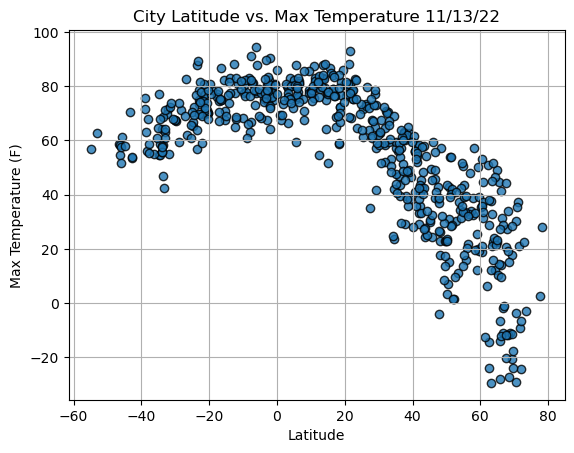

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

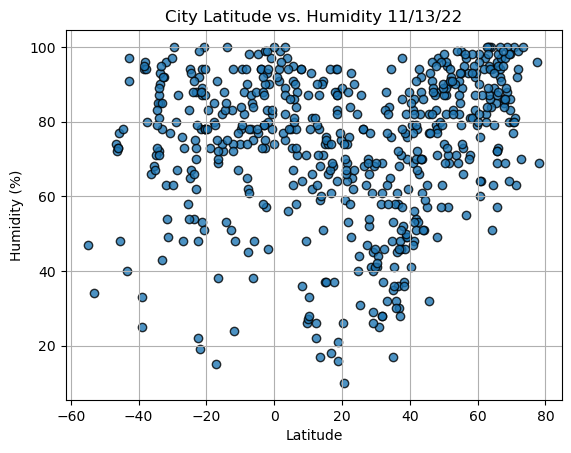

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

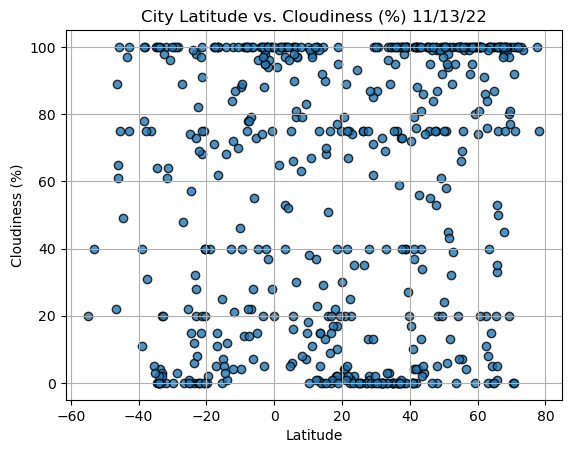

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

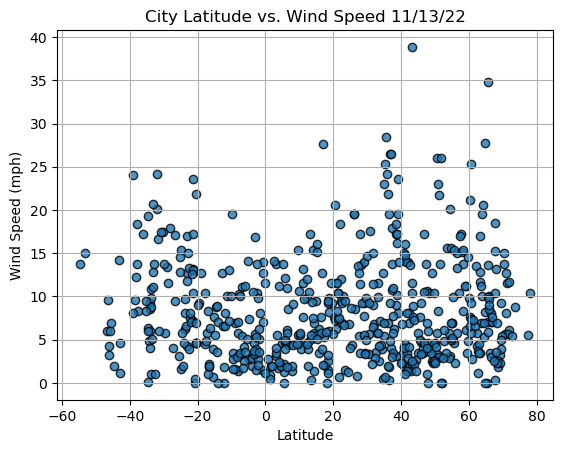

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()